In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [2]:
def getDataOld(filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)
        
    method_map = {
        'one_cut_one_quant': '1_dtable',
        'one_cut_many_quants': 'many_dtable',
        'many_cuts_one_quant_1': '1_maxsat',
        'many_cuts_one_quant_2': '1_1_maxsat',
    }
    data['method'] = data['method'].astype(str).map(method_map)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

def getData(filename):
    data = pd.read_json(filename)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP/prover9' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        elif 'testing/TSTP/leanCoP' in s:
            return 3
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

In [3]:
filename = "results.json"
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
print(data_other_exp.shape)
data_other_exp[['method', 'file', 'status']]

(4675, 40)


,method,file,status
168,1_dtable,SumExampleProof(98),cutintro_other_exception
256,1_dtable,testing/TSTP/prover9/RNG/RNG039-1/Prover9---11...,cutintro_other_exception
270,1_dtable,testing/TSTP/prover9/LCL/LCL516+1/Prover9---11...,cutintro_other_exception
335,1_dtable,testing/TSTP/prover9/SYN/SYN012-1/Prover9---11...,cutintro_other_exception
390,1_dtable,testing/TSTP/prover9/GRP/GRP124-6.004/Prover9-...,cutintro_other_exception
391,1_dtable,testing/TSTP/prover9/LCL/LCL030-1/Prover9---11...,cutintro_other_exception
412,1_dtable,testing/TSTP/prover9/LCL/LCL401-1/Prover9---11...,cutintro_other_exception
418,1_dtable,testing/TSTP/prover9/SWV/SWV702-1/Prover9---11...,cutintro_other_exception
440,1_dtable,testing/TSTP/prover9/LCL/LCL379-1/Prover9---11...,cutintro_other_exception
505,1_dtable,testing/TSTP/prover9/LCL/LCL387-1/Prover9---11...,cutintro_other_exception


In [5]:
# Test that are ok in 1_dtable and fail for 1_maxsat

data_ocoq = data[data.method == '1_dtable']
data_mcoq1 = data[data.method == '1_maxsat']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcoq1'))

diff = merged[(merged.status_ocoq == 'ok') & (merged.status_mcoq1 != 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcoq1']]

(404, 79)


,file,status_ocoq,status_mcoq1
3,LinearExampleProof(4),ok,cutintro_uncompressible
4,LinearExampleProof(5),ok,cutintro_uncompressible
20,LinearEqExampleProof(2),ok,cutintro_uncompressible
32,SquareDiagonalExampleProof(2),ok,cutintro_uncompressible
44,SquareEdgesExampleProof(2),ok,cutintro_uncompressible
58,SquareEdges2DimExampleProof(4),ok,cutintro_uncompressible
59,SquareEdges2DimExampleProof(5),ok,cutintro_uncompressible
172,SumOfOnesExampleProof(2),ok,cutintro_uncompressible
173,SumOfOnesExampleProof(3),ok,cutintro_other_exception
174,UniformAssociativity3ExampleProof(1),ok,cutintro_uncompressible


In [6]:
# Test that are ok in 1_dtable and fail for 1_maxsat

data_ocoq = data[data.method == '1_dtable']
data_mcoq1 = data[data.method == '1_maxsat']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcmq1'))

diff = merged[(merged.status_ocoq != 'ok') & (merged.status_mcmq1 == 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcmq1']]

(23, 79)


,file,status_ocoq,status_mcmq1
18,LinearExampleProof(19),cutintro_timeout,ok
30,LinearEqExampleProof(12),cutintro_timeout,ok
42,SquareDiagonalExampleProof(12),cutintro_timeout,ok
54,SquareEdgesExampleProof(12),cutintro_timeout,ok
70,SquareEdges2DimExampleProof(16),cutintro_timeout,ok
164,SumOfOnesF2ExampleProof(6),cutintro_timeout,ok
170,SumOfOnesFExampleProof(6),cutintro_timeout,ok
177,UniformAssociativity3ExampleProof(4),cutintro_timeout,ok
216,testing/TSTP/prover9/GRP/GRP163-1/Prover9---11...,cutintro_timeout,ok
325,testing/TSTP/prover9/GRP/GRP144-1/Prover9---11...,cutintro_timeout,ok


In [7]:
# Regressions compared to previous test

previous_filename = "../2015-03-15/CutIntroDataLog.txt"
previous_data = getDataOld(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'])
#merged.head(0)

regression = merged[(merged.status_y == 'ok') & (merged.status_x != 'ok')]
#regression.head(0)
print(regression.shape)

regression_delta = regression[(regression.method == '1_dtable') | (regression.method == 'many_dtable')]
print(regression_delta.shape)
#regression_delta.head(0)

regression_maxsat = regression[((regression.method == '1_maxsat') | (regression.method == '1_1_maxsat')) ]
print(regression_maxsat.shape)
#regression_maxsat.head(0)

regression[['method', 'file', 'status_x', 'status_y']]

(421, 58)
(63, 58)
(352, 58)


,method,file,status_x,status_y
93,1_dtable,testing/TSTP/prover9/SET/SET622+3/Prover9---11...,cutintro_uncompressible,ok
132,1_dtable,testing/TSTP/prover9/GRP/GRP639+1/Prover9---11...,cutintro_uncompressible,ok
142,1_dtable,testing/TSTP/prover9/BOO/BOO006-1/Prover9---11...,cutintro_uncompressible,ok
174,1_dtable,testing/TSTP/prover9/SET/SET669+3/Prover9---11...,cutintro_uncompressible,ok
231,1_dtable,testing/TSTP/prover9/GEO/GEO126+1/Prover9---11...,cutintro_uncompressible,ok
264,1_dtable,testing/TSTP/prover9/SEU/SEU236+3/Prover9---11...,cutintro_uncompressible,ok
287,1_dtable,testing/TSTP/prover9/LAT/LAT304+1/Prover9---11...,cutintro_uncompressible,ok
307,1_dtable,testing/TSTP/prover9/GRA/GRA008+2/Prover9---11...,cutintro_uncompressible,ok
371,1_dtable,testing/TSTP/prover9/SET/SET667+3/Prover9---11...,cutintro_other_exception,ok
386,1_dtable,testing/TSTP/prover9/GRP/GRP529-1/Prover9---11...,cutintro_timeout,ok


In [8]:
methods = sorted(set(data.method.dropna()))

dbs = {
    0: 'Proof examples',
    1: 'Prover9',
    2: 'VeriT',
    3: 'LeanCoP',
}

In [9]:
print("=== Number of tests per database and method:\n")

for dbi, dbname in dbs.items():
    for method in methods:
        print("{0} - {1}: {2}".format(dbname, method,
                                     data[(data.method==method) & (data.db==dbi)].shape[0]))
    print()

=== Number of tests per database and method:

Proof examples - 1_1_maxsat: 95
Proof examples - 1_dtable: 214
Proof examples - 1_maxsat: 323
Proof examples - 2_2_maxsat: 54
Proof examples - 2_maxsat: 119
Proof examples - many_dtable: 127

Prover9 - 1_1_maxsat: 3203
Prover9 - 1_dtable: 3203
Prover9 - 1_maxsat: 3202
Prover9 - 2_2_maxsat: 3202
Prover9 - 2_maxsat: 3203
Prover9 - many_dtable: 3203

VeriT - 1_1_maxsat: 142
VeriT - 1_dtable: 142
VeriT - 1_maxsat: 142
VeriT - 2_2_maxsat: 142
VeriT - 2_maxsat: 142
VeriT - many_dtable: 142

LeanCoP - 1_1_maxsat: 572
LeanCoP - 1_dtable: 572
LeanCoP - 1_maxsat: 572
LeanCoP - 2_2_maxsat: 572
LeanCoP - 2_maxsat: 572
LeanCoP - many_dtable: 572



In [10]:
states = set(data.status.values)
status_colors = {}
for s in data.status.values:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s.endswith('timeout'):
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

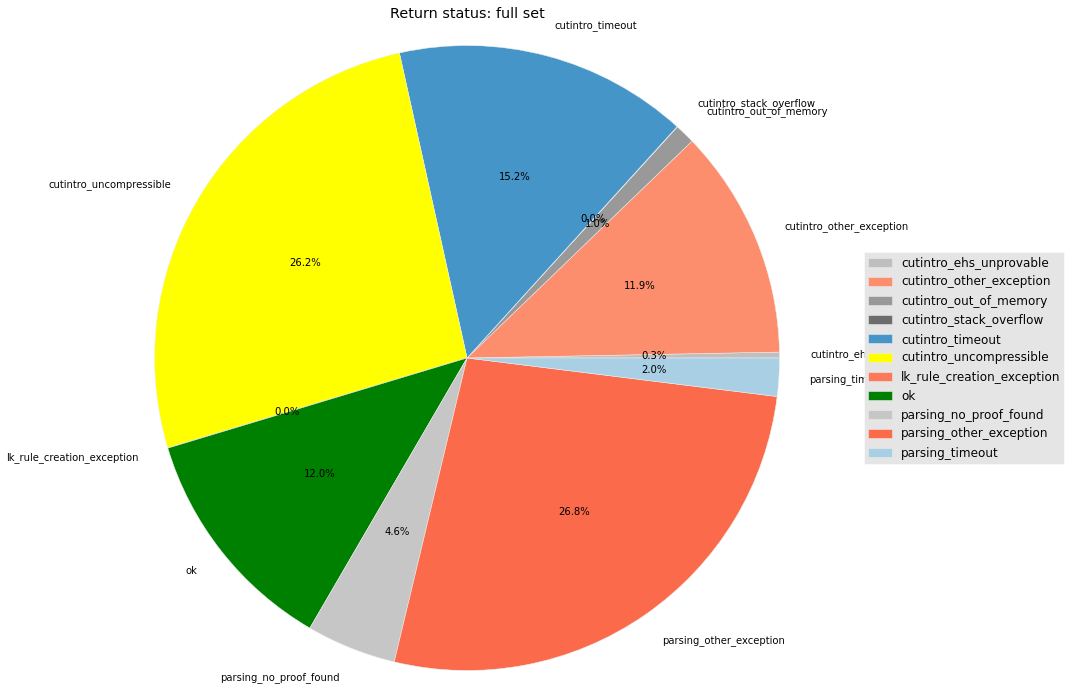

In [11]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

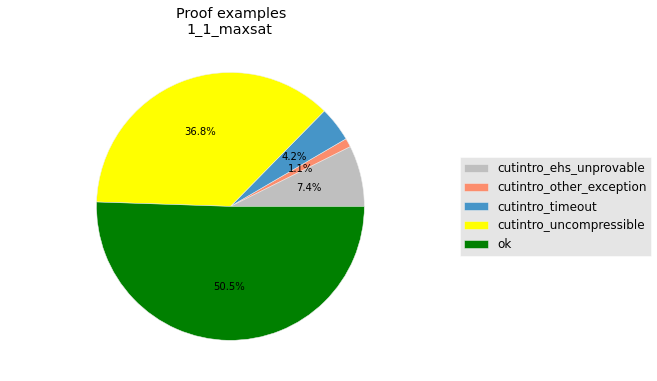

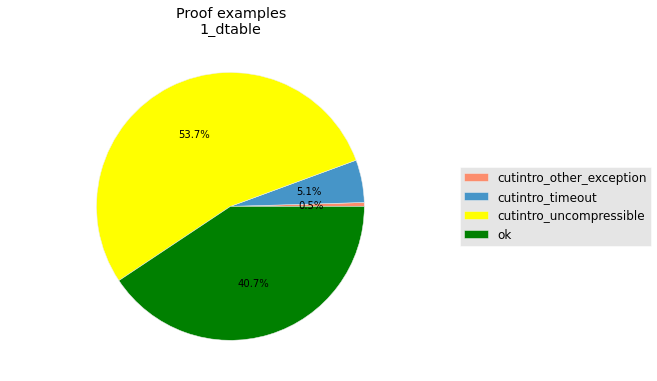

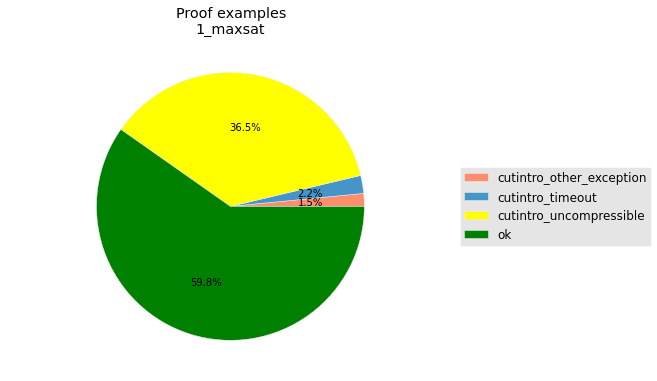

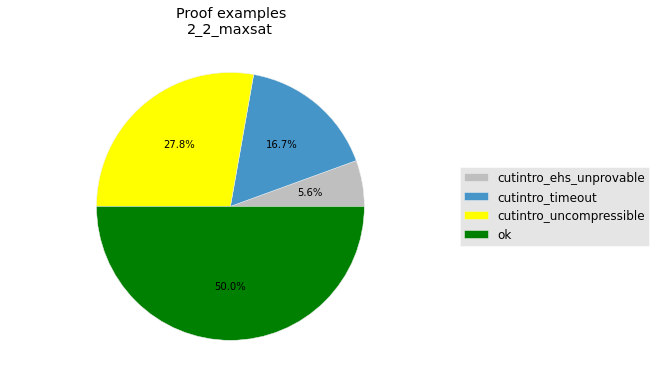

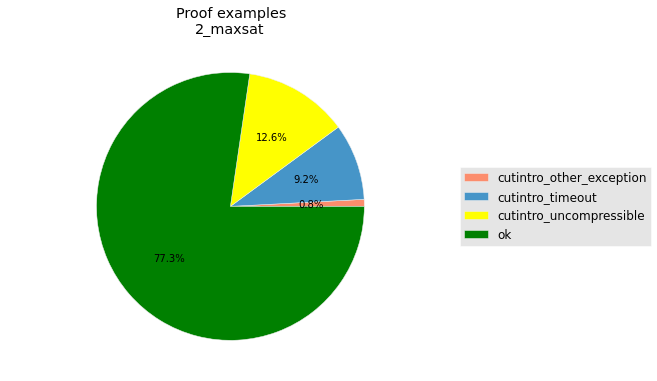

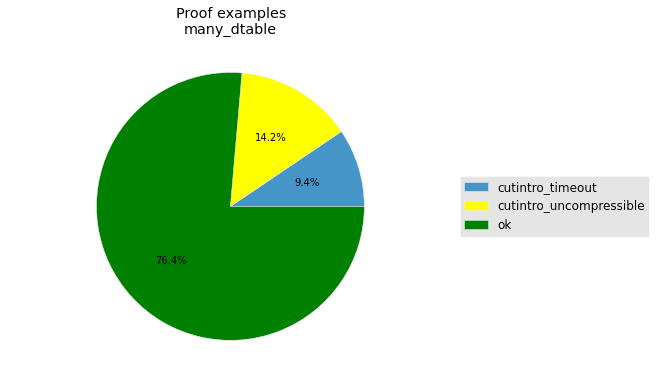

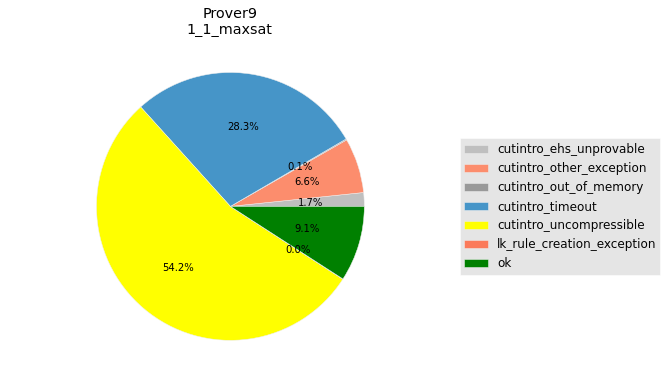

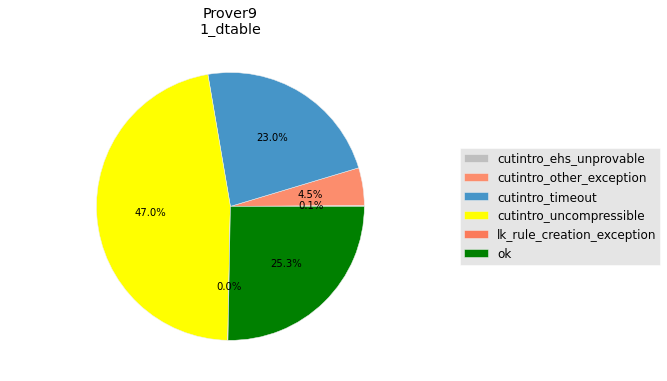

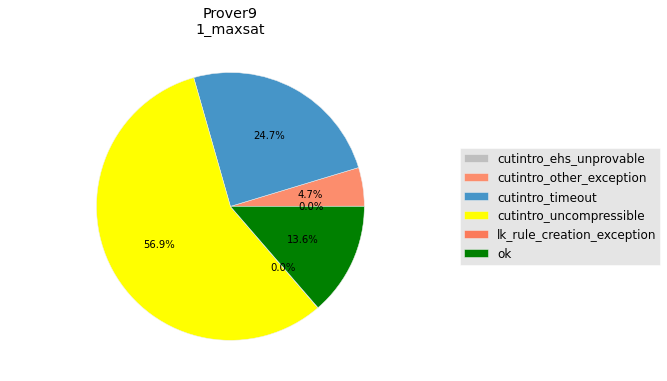

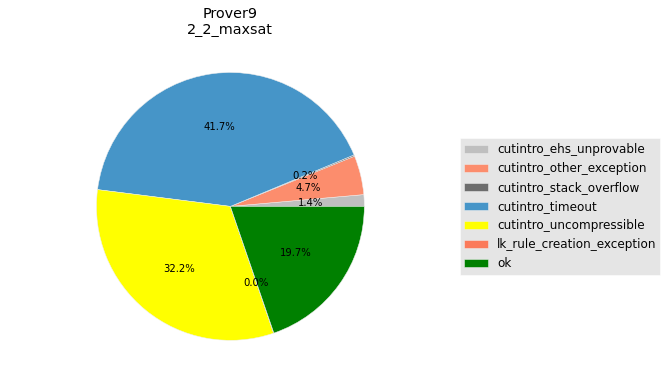

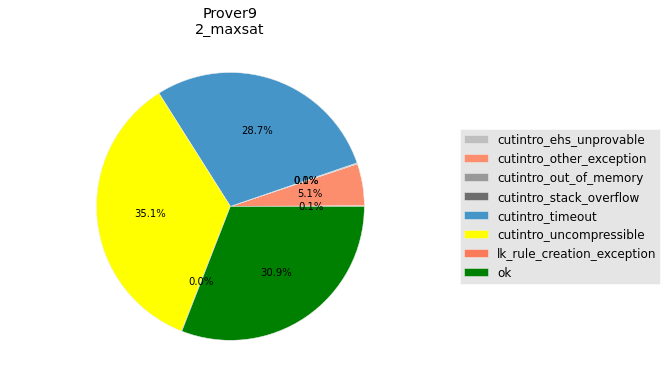

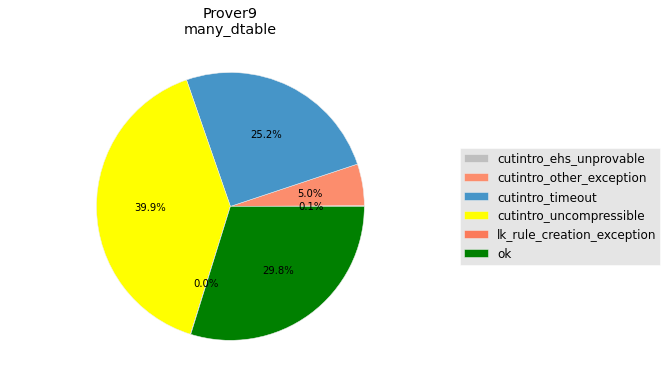

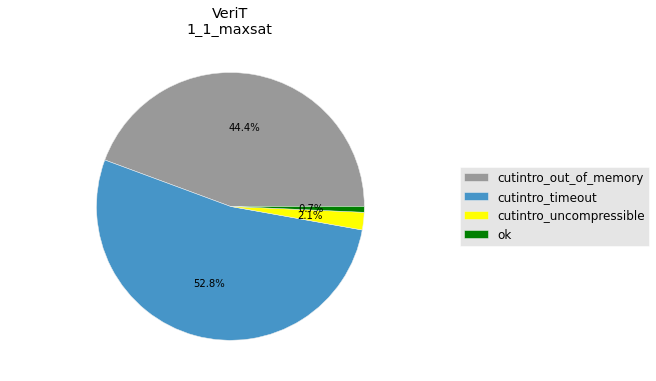

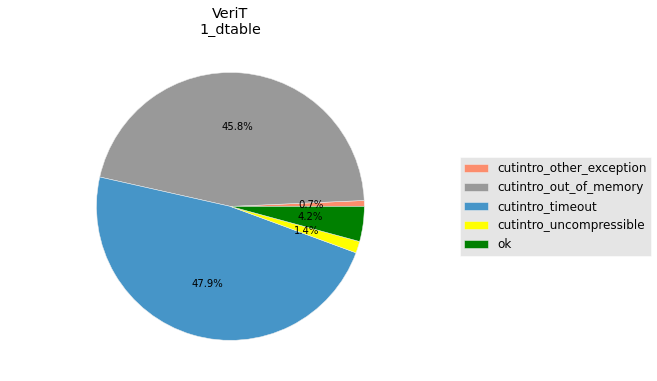

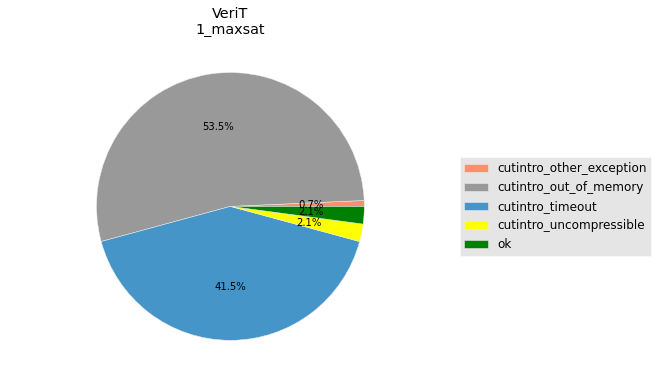

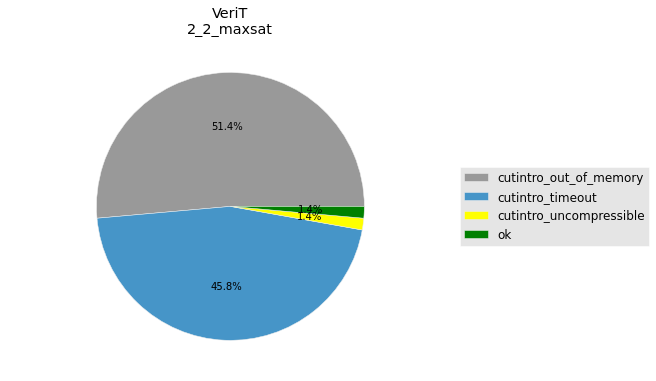

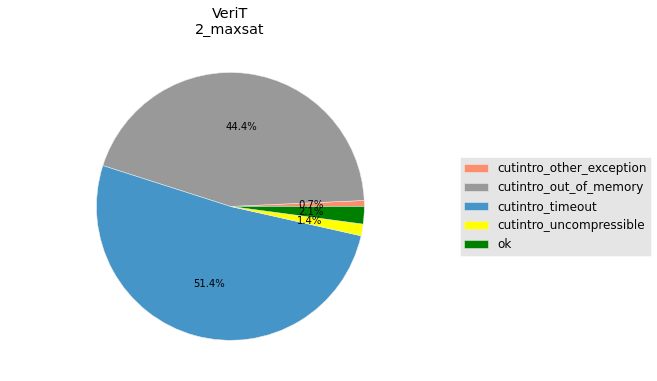

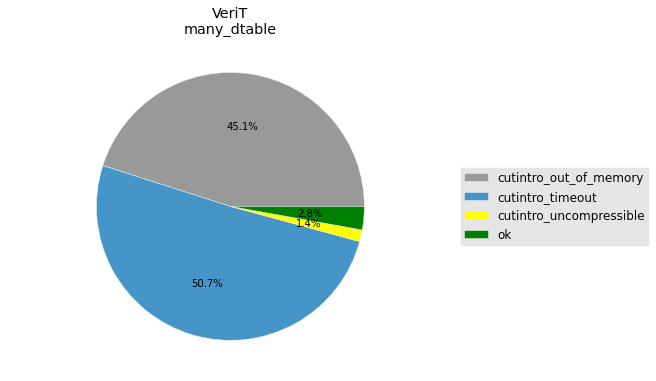

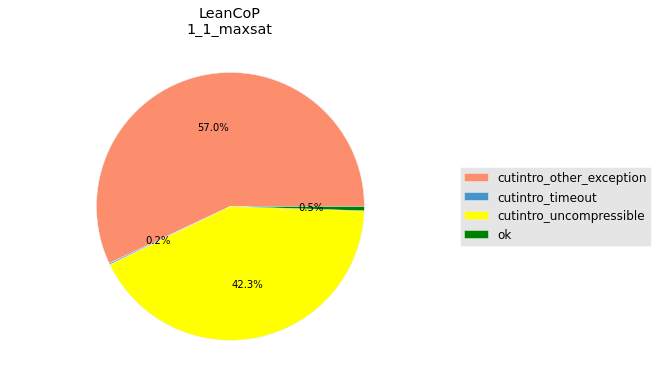

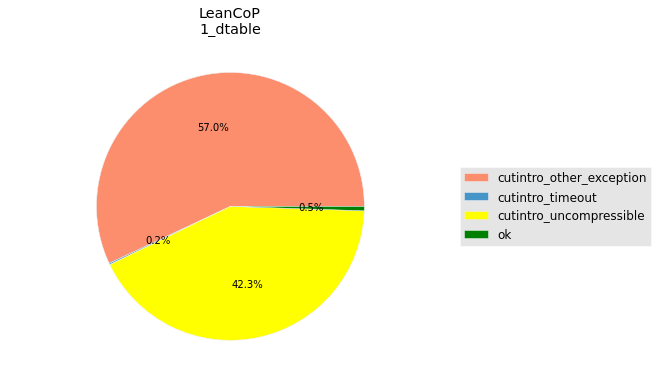

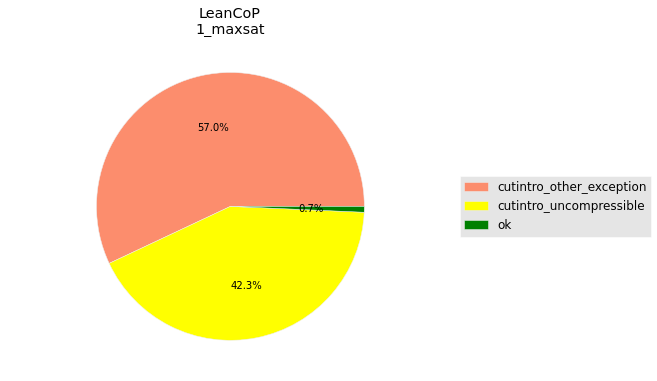

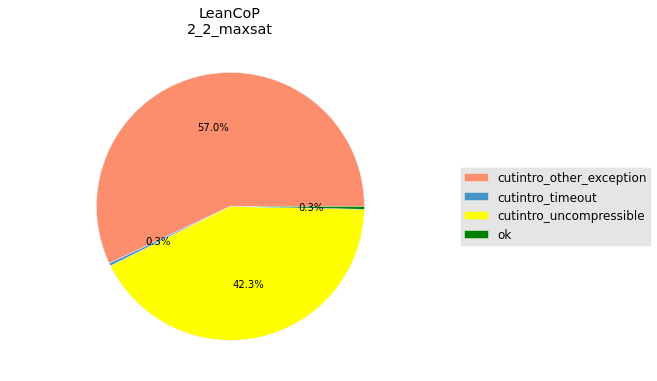

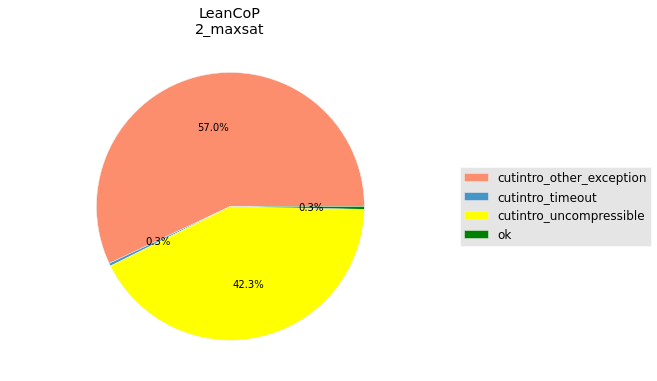

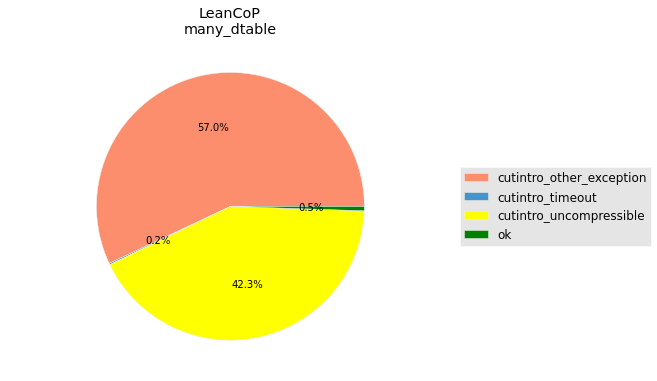

In [12]:
for dbi, db in dbs.items():
    for method in methods:
        subdata = data[(data.db==dbi) & (data.method==method)].groupby('status').size()
        plot_status(subdata, title='{0}\n{1}'.format(db,method), labels=None, figsize=(8,6))
        plt.show()

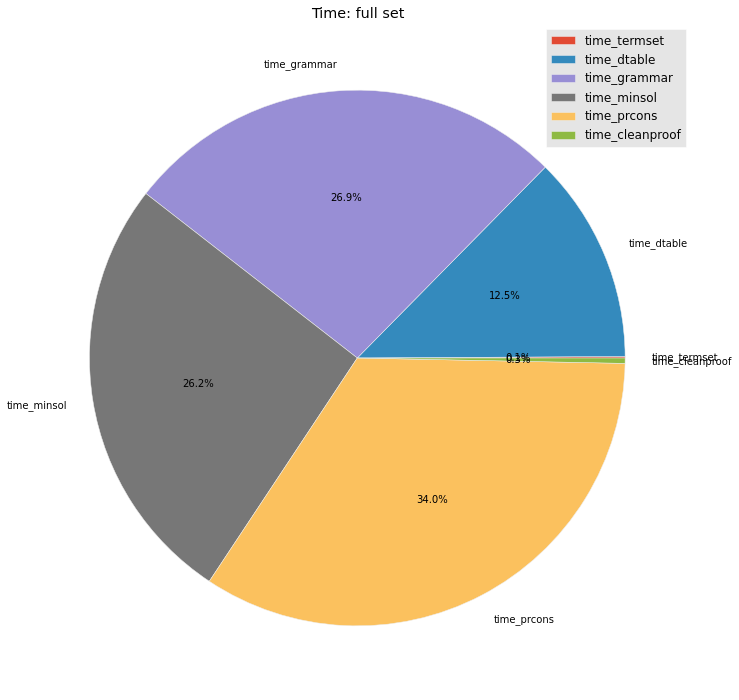

In [13]:
timecols = ['time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
plt.axis('equal')
data[timecols].mean().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%',
                           title='Time: full set', legend=True).set_ylabel('')

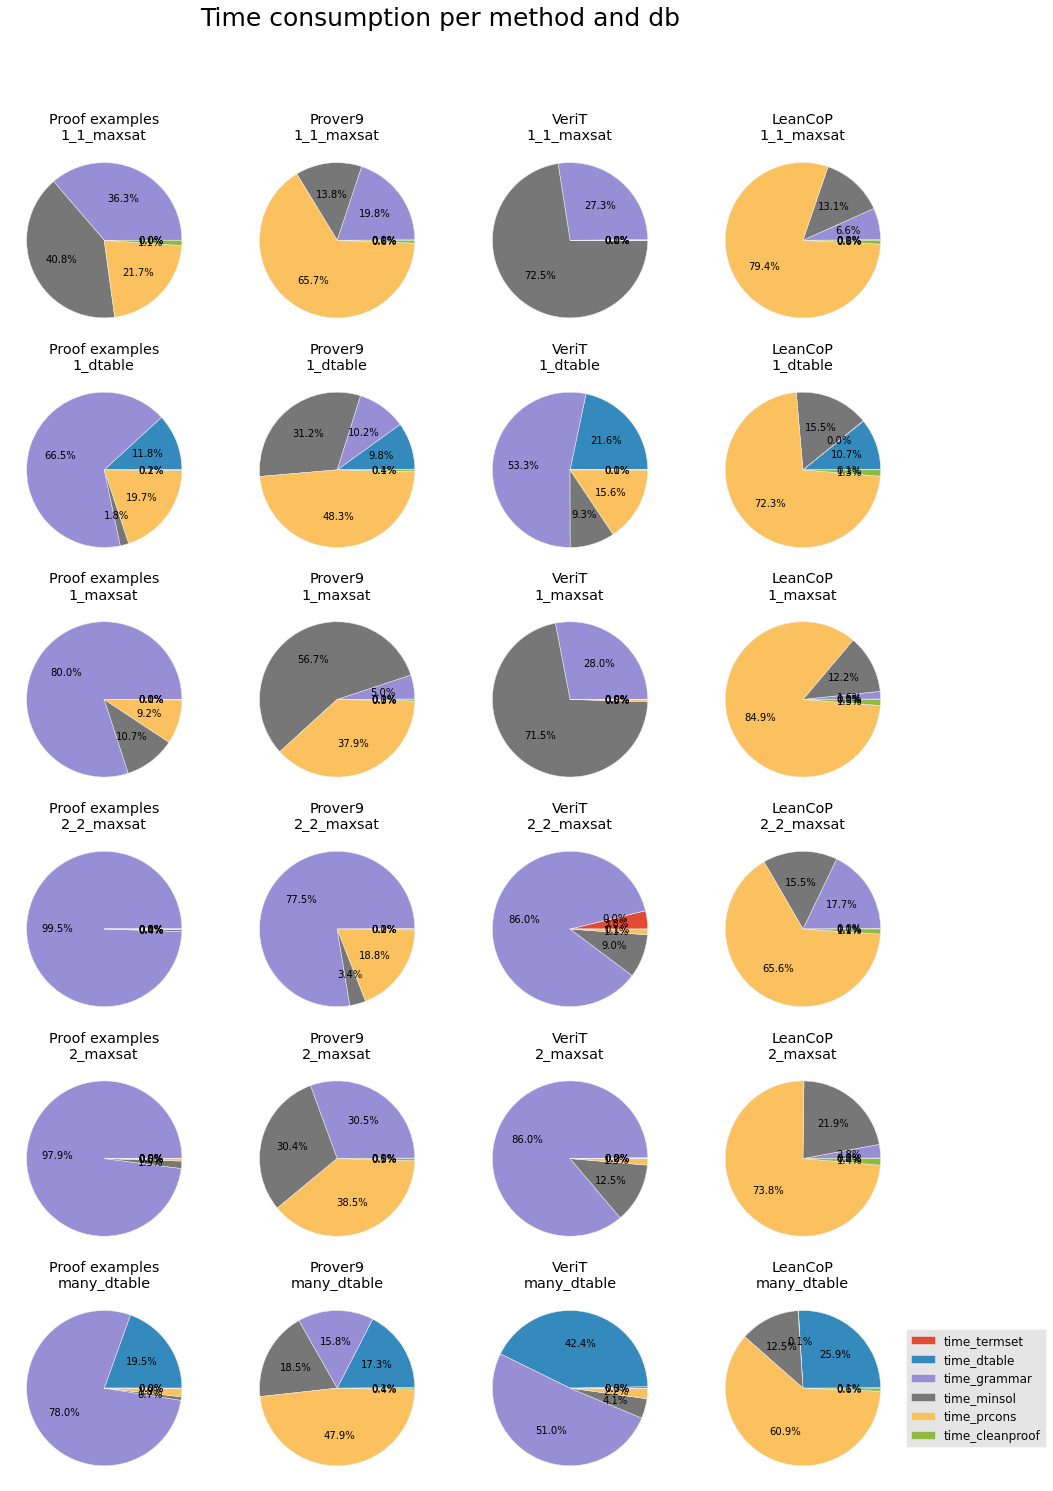

In [14]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        data[(data.db==dbi) & (data.method==method)][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method)).set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

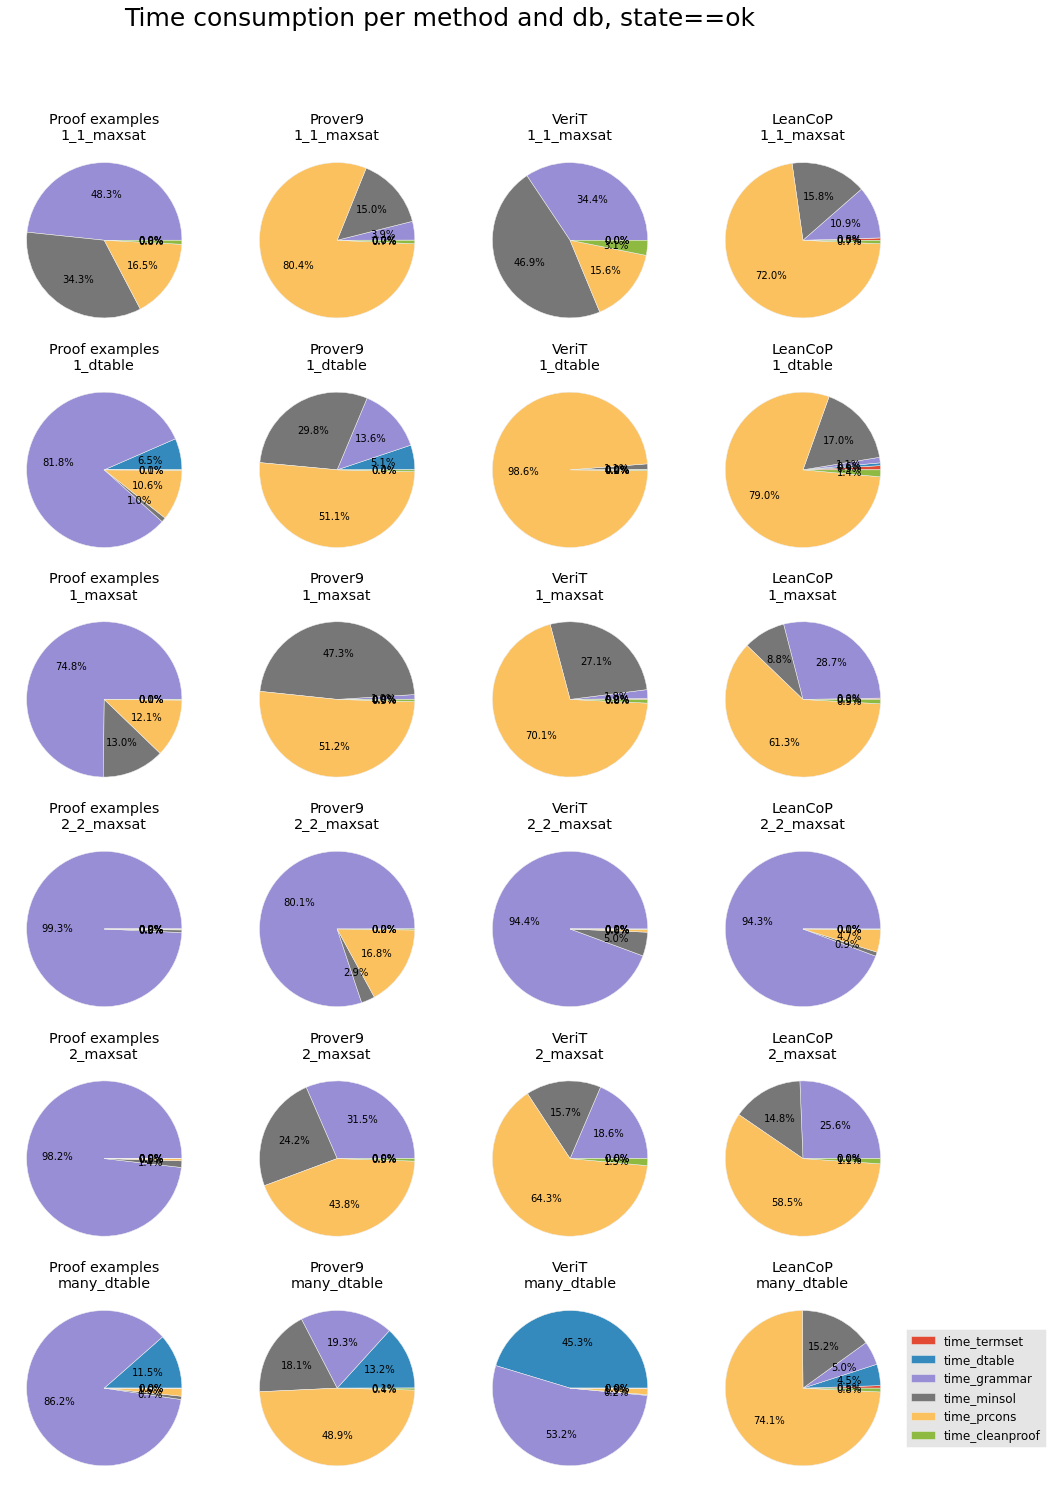

In [15]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db, state==ok', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        ax = data[(data.db==dbi) & (data.method==method) & (data.status=='ok')][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method))
        ax.set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
data['status'].value_counts()

parsing_other_exception       10515
cutintro_uncompressible       10277
cutintro_timeout               5971
ok                             4695
cutintro_other_exception       4675
parsing_no_proof_found         1824
parsing_timeout                 773
cutintro_out_of_memory          409
cutintro_ehs_unprovable         119
cutintro_stack_overflow           8
lk_rule_creation_exception        6
dtype: int64

In [17]:
# Different grammar sizes between different methods: one cut with one quantifier
data_dtable = data[(data.method == '1_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '1_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
40,SquareEdges2DimExampleProof(6),13,12
41,SquareEdges2DimExampleProof(7),15,14
42,SquareEdges2DimExampleProof(8),16,14
43,SquareEdges2DimExampleProof(9),17,14
44,SquareEdges2DimExampleProof(10),19,16
45,SquareEdges2DimExampleProof(11),20,16
46,SquareEdges2DimExampleProof(12),21,16
47,SquareEdges2DimExampleProof(13),23,18
48,SquareEdges2DimExampleProof(14),24,18
49,SquareEdges2DimExampleProof(15),25,18


In [18]:
# Different grammar sizes between different methods: one cut with multiple quantifiers
data_dtable = data[(data.method == 'many_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '2_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
36,SquareEdges2DimExampleProof(4),10,8
37,SquareEdges2DimExampleProof(5),12,9
38,SquareEdges2DimExampleProof(6),13,9
39,SquareEdges2DimExampleProof(7),15,10
40,SquareEdges2DimExampleProof(8),16,10
41,SquareEdges2DimExampleProof(9),17,11
42,SquareEdges2DimExampleProof(10),19,11
65,SumOfOnesExampleProof(3),12,10
66,SumOfOnesExampleProof(4),15,11
67,SumOfOnesExampleProof(5),18,12


In [19]:
# Better compression with 2x2 quantifiers than 1x2 quantifiers or 2x1 quantifiers
data_1x2 = data[(data.method == '2_maxsat') & data.grammar_size]
data_2x1 = data[(data.method == '1_1_maxsat') & data.grammar_size]
data_2x2 = data[(data.method == '2_2_maxsat') & data.grammar_size]

merged = data_1x2.merge(data_2x1, on='file', suffixes=('_1x2', '_2x1')) \
    .merge(data_2x2, on='file')
merged[(merged.grammar_size < merged.grammar_size_1x2) & (merged.grammar_size < merged.grammar_size_2x1)] \
    [['file', 'grammar_size', 'grammar_size_2x1', 'grammar_size_1x2']]

,file,grammar_size,grammar_size_2x1,grammar_size_1x2
23,testing/TSTP/prover9/PRO/PRO005+3/Prover9---11...,39,41,40
27,testing/TSTP/prover9/GRP/GRP128-4.003/Prover9-...,18,20,20
28,testing/TSTP/prover9/SWV/SWV795-1/Prover9---11...,15,17,16
31,testing/TSTP/prover9/GEO/GEO180+2/Prover9---11...,14,17,15
33,testing/TSTP/prover9/SEU/SEU451+1/Prover9---11...,13,15,15
36,testing/TSTP/prover9/GRP/GRP035-3/Prover9---11...,18,21,19
45,testing/TSTP/prover9/GEO/GEO191+3/Prover9---11...,12,15,13
46,testing/TSTP/prover9/PRO/PRO005+2/Prover9---11...,38,40,39
49,testing/TSTP/prover9/KLE/KLE021+4/Prover9---11...,26,30,27
52,testing/TSTP/prover9/GRP/GRP174-1/Prover9---11...,15,17,16


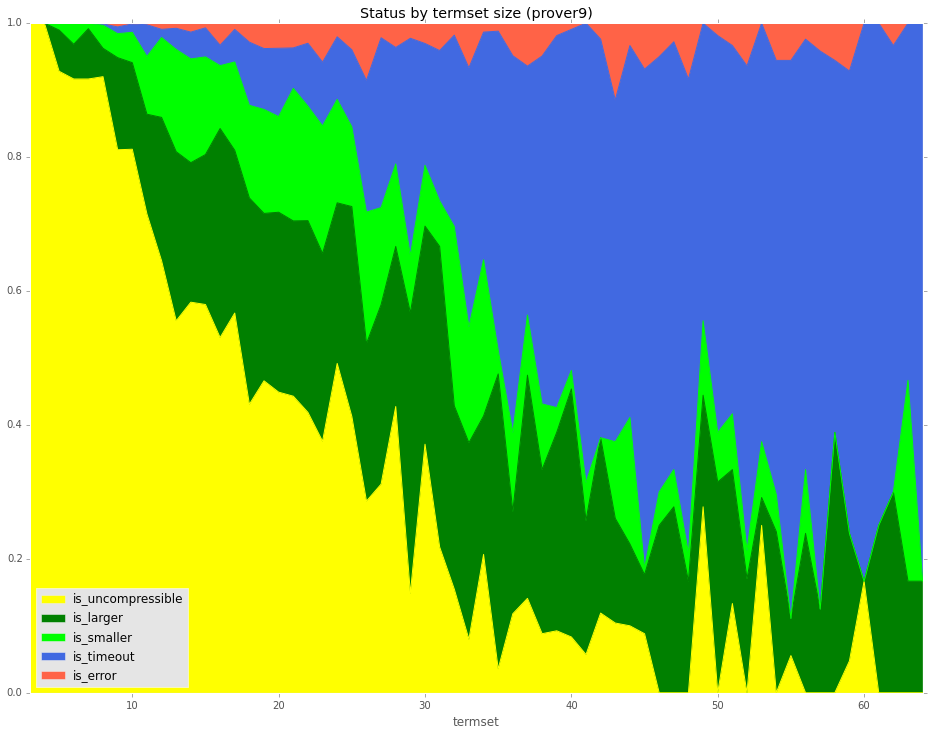

In [20]:
data['is_smaller'] = (data.status=='ok') & (data.ehs_resinf < data.resinf_input)
data['is_larger'] = (data.status=='ok') & (data.ehs_resinf >= data.resinf_input)
data['is_uncompressible'] = data.status.str.endswith('uncompressible')
data['is_timeout'] = data.status.str.endswith('timeout')
data['is_error'] = ~data.is_smaller & ~data.is_larger & ~data.is_uncompressible & ~data.is_timeout

data[(data.termset<65)&(data.db==1)].groupby('termset').mean() \
    [['is_uncompressible', 'is_larger', 'is_smaller', 'is_timeout', 'is_error']] \
    .plot(kind='area', figsize=(16,12), ylim=(0,1), title='Status by termset size (prover9)',
          color=['yellow', 'green', 'lime', 'royalblue', 'tomato'])

In [21]:
# Proofs with good compression of EHS/HS
data[data.ehs_resinf/data.hs_resinf < 0.1] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
3062,testing/TSTP/prover9/GRP/GRP482-1/Prover9---11...,1_dtable,36,404,39
15400,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_maxsat,11,130,10
22777,testing/TSTP/prover9/GRP/GRP482-1/Prover9---11...,1_1_maxsat,14,484,39
28667,testing/TSTP/prover9/LCL/LCL231-3/Prover9---11...,2_maxsat,32,329,24
34616,testing/TSTP/prover9/GRP/GRP573-1/Prover9---11...,2_2_maxsat,13,131,19
34838,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,2_2_maxsat,11,119,10


In [22]:
# Proofs with good compression of EHS/input
data[data.ehs_resinf/data.resinf_input < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
444,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,1_dtable,14,14,76
1441,testing/TSTP/prover9/SEU/SEU154+1/Prover9---11...,1_dtable,12,12,62
6961,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,many_dtable,14,14,76
7913,testing/TSTP/prover9/BOO/BOO011-4/Prover9---11...,many_dtable,3,4,40
7958,testing/TSTP/prover9/SEU/SEU154+1/Prover9---11...,many_dtable,12,12,62
9257,testing/TSTP/prover9/NUM/NUM477+2/Prover9---11...,many_dtable,11,12,59
20299,testing/TSTP/prover9/REL/REL015+1/Prover9---11...,1_1_maxsat,33,216,169
22455,testing/TSTP/prover9/NUM/NUM477+2/Prover9---11...,1_1_maxsat,11,12,59
26668,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,2_maxsat,14,14,76


In [23]:
# Proofs with blowup
data[data.ehs_resinf > 5*data.hs_resinf] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
2875,testing/TSTP/prover9/SYN/SYN445-1/Prover9---11...,1_dtable,1943,362,447
9392,testing/TSTP/prover9/SYN/SYN445-1/Prover9---11...,many_dtable,1943,362,447
20304,testing/TSTP/prover9/GRP/GRP669-1/Prover9---11...,1_1_maxsat,236,46,27
22472,testing/TSTP/prover9/HWC/HWC002-1/Prover9---11...,1_1_maxsat,178,19,45
33938,testing/TSTP/prover9/GRP/GRP708-1/Prover9---11...,2_2_maxsat,138,23,18


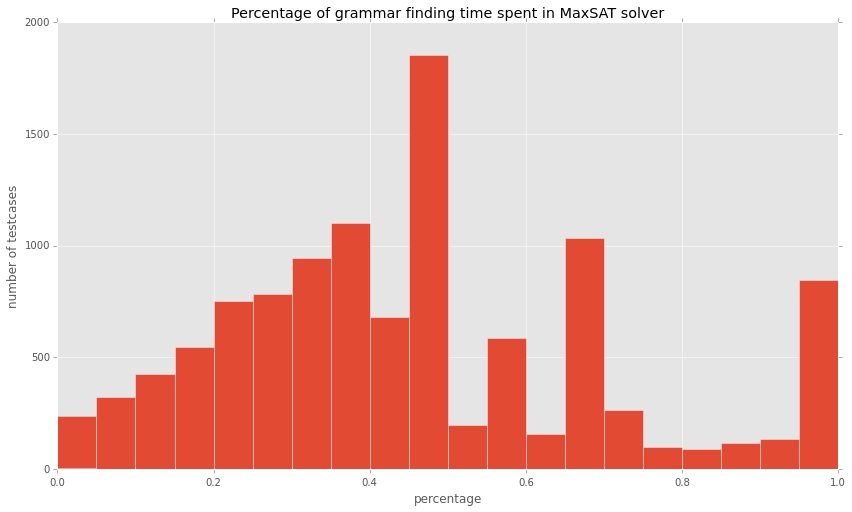

In [24]:
ax = (data.time_maxsat/data.time_grammar).dropna().plot(kind='hist', figsize=(14,8),
    title='Percentage of grammar finding time spent in MaxSAT solver', bins=20)
ax.set_xlabel('percentage')
ax.set_ylabel('number of testcases')